<h2><strong>Importing the Dependencies</strong></h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

<h2><strong>Data Collection & Analysis</strong></h2>

In [2]:
idf = pd.read_csv("insurance.csv")

In [3]:
idf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
idf.shape

(1338, 7)

In [6]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<strong><h2>Categorical Features:</h2></strong>
<ul>
    <li><strong><h3>Sex</h3></strong></li>
    <li><strong><h3>Smoker</h3></strong></li>
    <li><strong><h3>Region</h3></strong></li>
</ul>

In [7]:
idf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
idf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
import warnings
warnings.filterwarnings('ignore')

<h2><strong>Data Visualization</strong></h2>

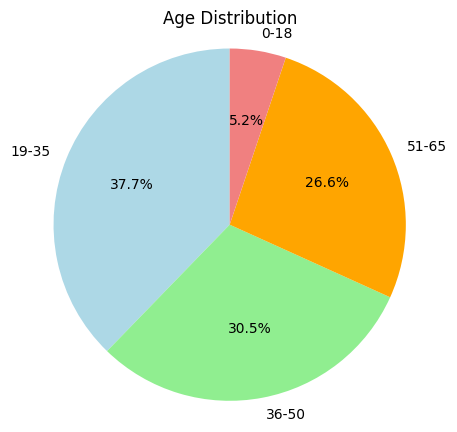

In [14]:
age_categories = pd.cut(idf['age'], bins=[0, 18, 35, 50, 65], 
                        labels=['0-18', '19-35', '36-50', '51-65'])
age_counts = age_categories.value_counts()
plt.figure(figsize=(5,5))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Age Distribution')
plt.axis('equal')
plt.show()

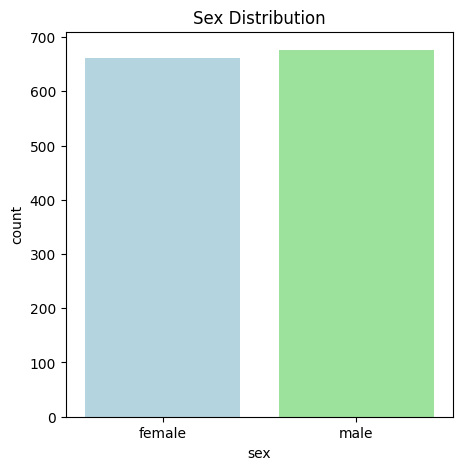

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=idf, palette=['lightblue', 'lightgreen'])
plt.title('Sex Distribution')
plt.show()

In [23]:
idf['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

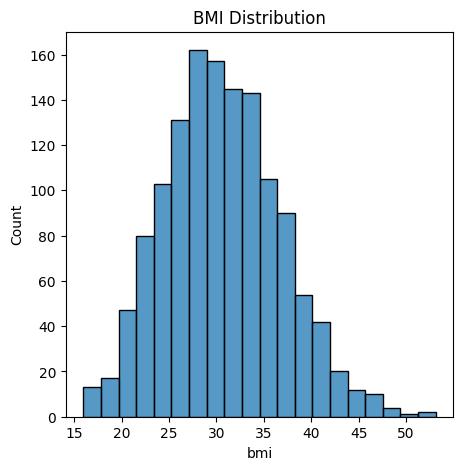

In [28]:
plt.figure(figsize=(5,5))
sns.histplot(idf['bmi'], bins=20, kde=False)
plt.title('BMI Distribution')
plt.show()

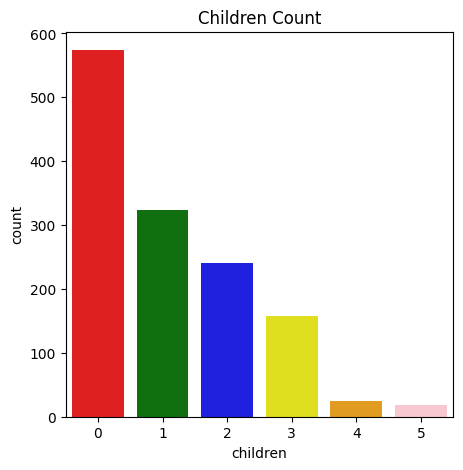

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=idf,palette=['red', 'green', 'blue', 'yellow', 'orange', 'pink'])
plt.title('Children Count')
plt.show()

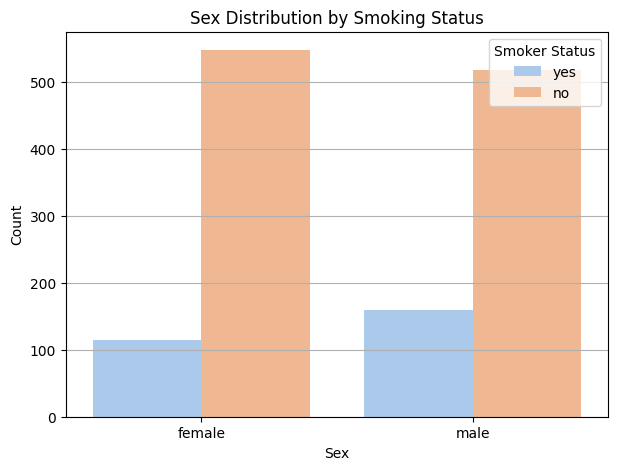

In [47]:
plt.figure(figsize=(7, 5))
sns.countplot(data=idf, x='sex', hue='smoker', palette='pastel')

plt.title('Sex Distribution by Smoking Status')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Smoker Status', loc='upper right')
plt.grid(axis='y')
plt.show()

In [43]:
idf['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

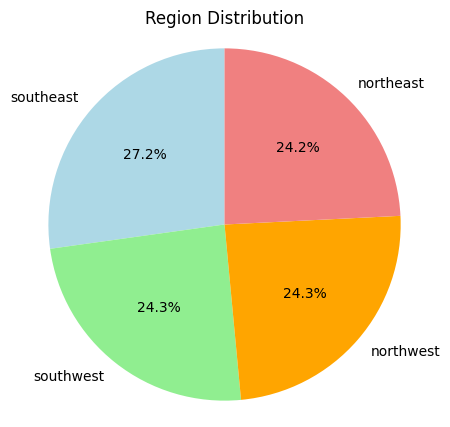

In [46]:
region_counts = idf['region'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Region Distribution')
plt.axis('equal')
plt.show()

In [48]:
idf['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

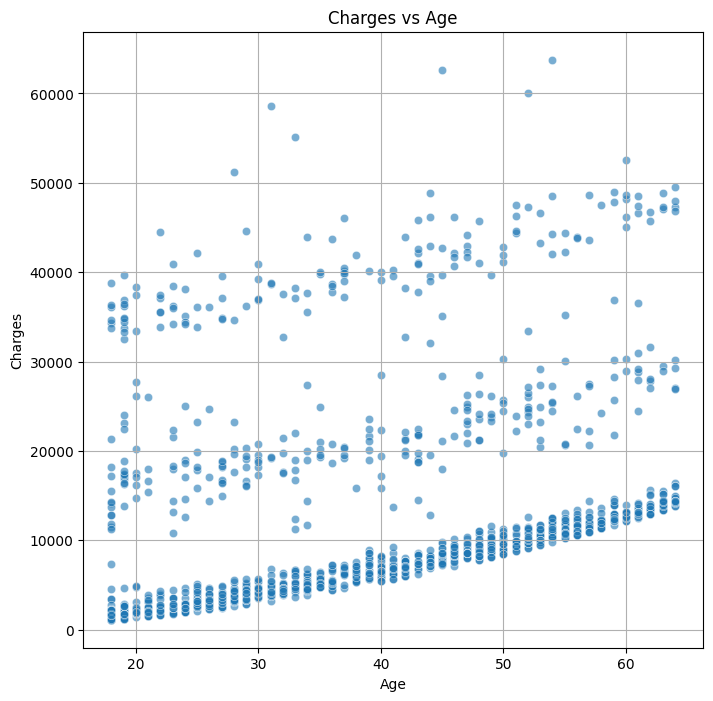

In [52]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=idf, x='age', y='charges', alpha=0.6)
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

<h2><strong>Data Pre-Processing</strong></h2>

In [55]:
# encoding sex column
idf.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
idf.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
idf.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [78]:
X = idf.drop(columns=['charges', 'marker'], axis=1)
X = pd.get_dummies(X, drop_first=True)
Y = idf['charges']

In [79]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [80]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


<h2><strong>Splitting the data into Training data & Testing Data</strong></h2>

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


<h2><strong>Model Training</strong></h2>

<h2><strong>Linear Regression</strong></h2>

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [84]:
regressor = LinearRegression()

In [85]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

In [95]:
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [96]:
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [98]:
# Make predictions
Y_pred_linear = regressor.predict(X_test)
Y_pred_forest = random_forest_regressor.predict(X_test)
Y_pred_tree = decision_tree_regressor.predict(X_test)

In [99]:
# Evaluate models
models = ['Linear Regression', 'Random Forest Regression', 'Decision Tree Regression']
mse_scores = [
    mean_squared_error(Y_test, Y_pred_linear),
    mean_squared_error(Y_test, Y_pred_forest),
    mean_squared_error(Y_test, Y_pred_tree)
]

In [100]:
r2_scores = [
    r2_score(Y_test, Y_pred_linear),
    r2_score(Y_test, Y_pred_forest),
    r2_score(Y_test, Y_pred_tree)
]

In [101]:
# Display results
results = pd.DataFrame({
    'Model': models,
    'Mean Squared Error': mse_scores,
    'R-squared': r2_scores
})

print(results)

                      Model  Mean Squared Error  R-squared
0         Linear Regression        3.833704e+07   0.744727
1  Random Forest Regression        2.434132e+07   0.837920
2  Decision Tree Regression        4.256525e+07   0.716573


<h2><strong>Model Evaluation</strong></h2>

In [86]:
training_data_prediction =regressor.predict(X_train)

In [87]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [88]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [89]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


<h2><strong>Building Predictive System</strong></h2>

In [90]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960496


In [102]:
# Evaluate the model
Y_pred_forest = random_forest_regressor.predict(X_test)
mse_forest = mean_squared_error(Y_test, Y_pred_forest)
r2_forest = r2_score(Y_test, Y_pred_forest)

print(f'Random Forest Regression MSE: {mse_forest}, R^2: {r2_forest}')

# Prepare input data for prediction
input_data = (31, 1, 25.74, 0, 1, 0)  # Example input (age, sex (1 for male), bmi, children, smoker (1 for yes), region (encoded))

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predicting using the trained model
prediction = random_forest_regressor.predict(input_data_reshaped)

print('The insurance cost is USD', prediction[0])

Random Forest Regression MSE: 24341319.02581295, R^2: 0.8379198591254433
The insurance cost is USD 3729.6420035000065


In [103]:
import joblib

# Train your model (this should be in your model training script)
# Assuming 'random_forest_regressor' is your trained model
joblib.dump(random_forest_regressor, 'random_forest_model.pkl')

['random_forest_model.pkl']